<a href="https://colab.research.google.com/github/26Kenn07/Machine-Learning-Projects/blob/main/Credit_Card_Fraud_Using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading Dataset**

In [3]:
df = pd.read_csv('/content/card_transdata.csv')

In [4]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
df.shape

(27496, 8)

**Checking for NULL values**

In [6]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      1
fraud                             1
dtype: int64

**Filling null values with 0**

In [7]:
df['online_order'] = df['online_order'].fillna(0)

In [8]:
df['fraud'] = df['fraud'].fillna(0)

In [9]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

**Making Dataset small just for Visualisation**

In [10]:
df_new = df.sample(n=10000, random_state=42)

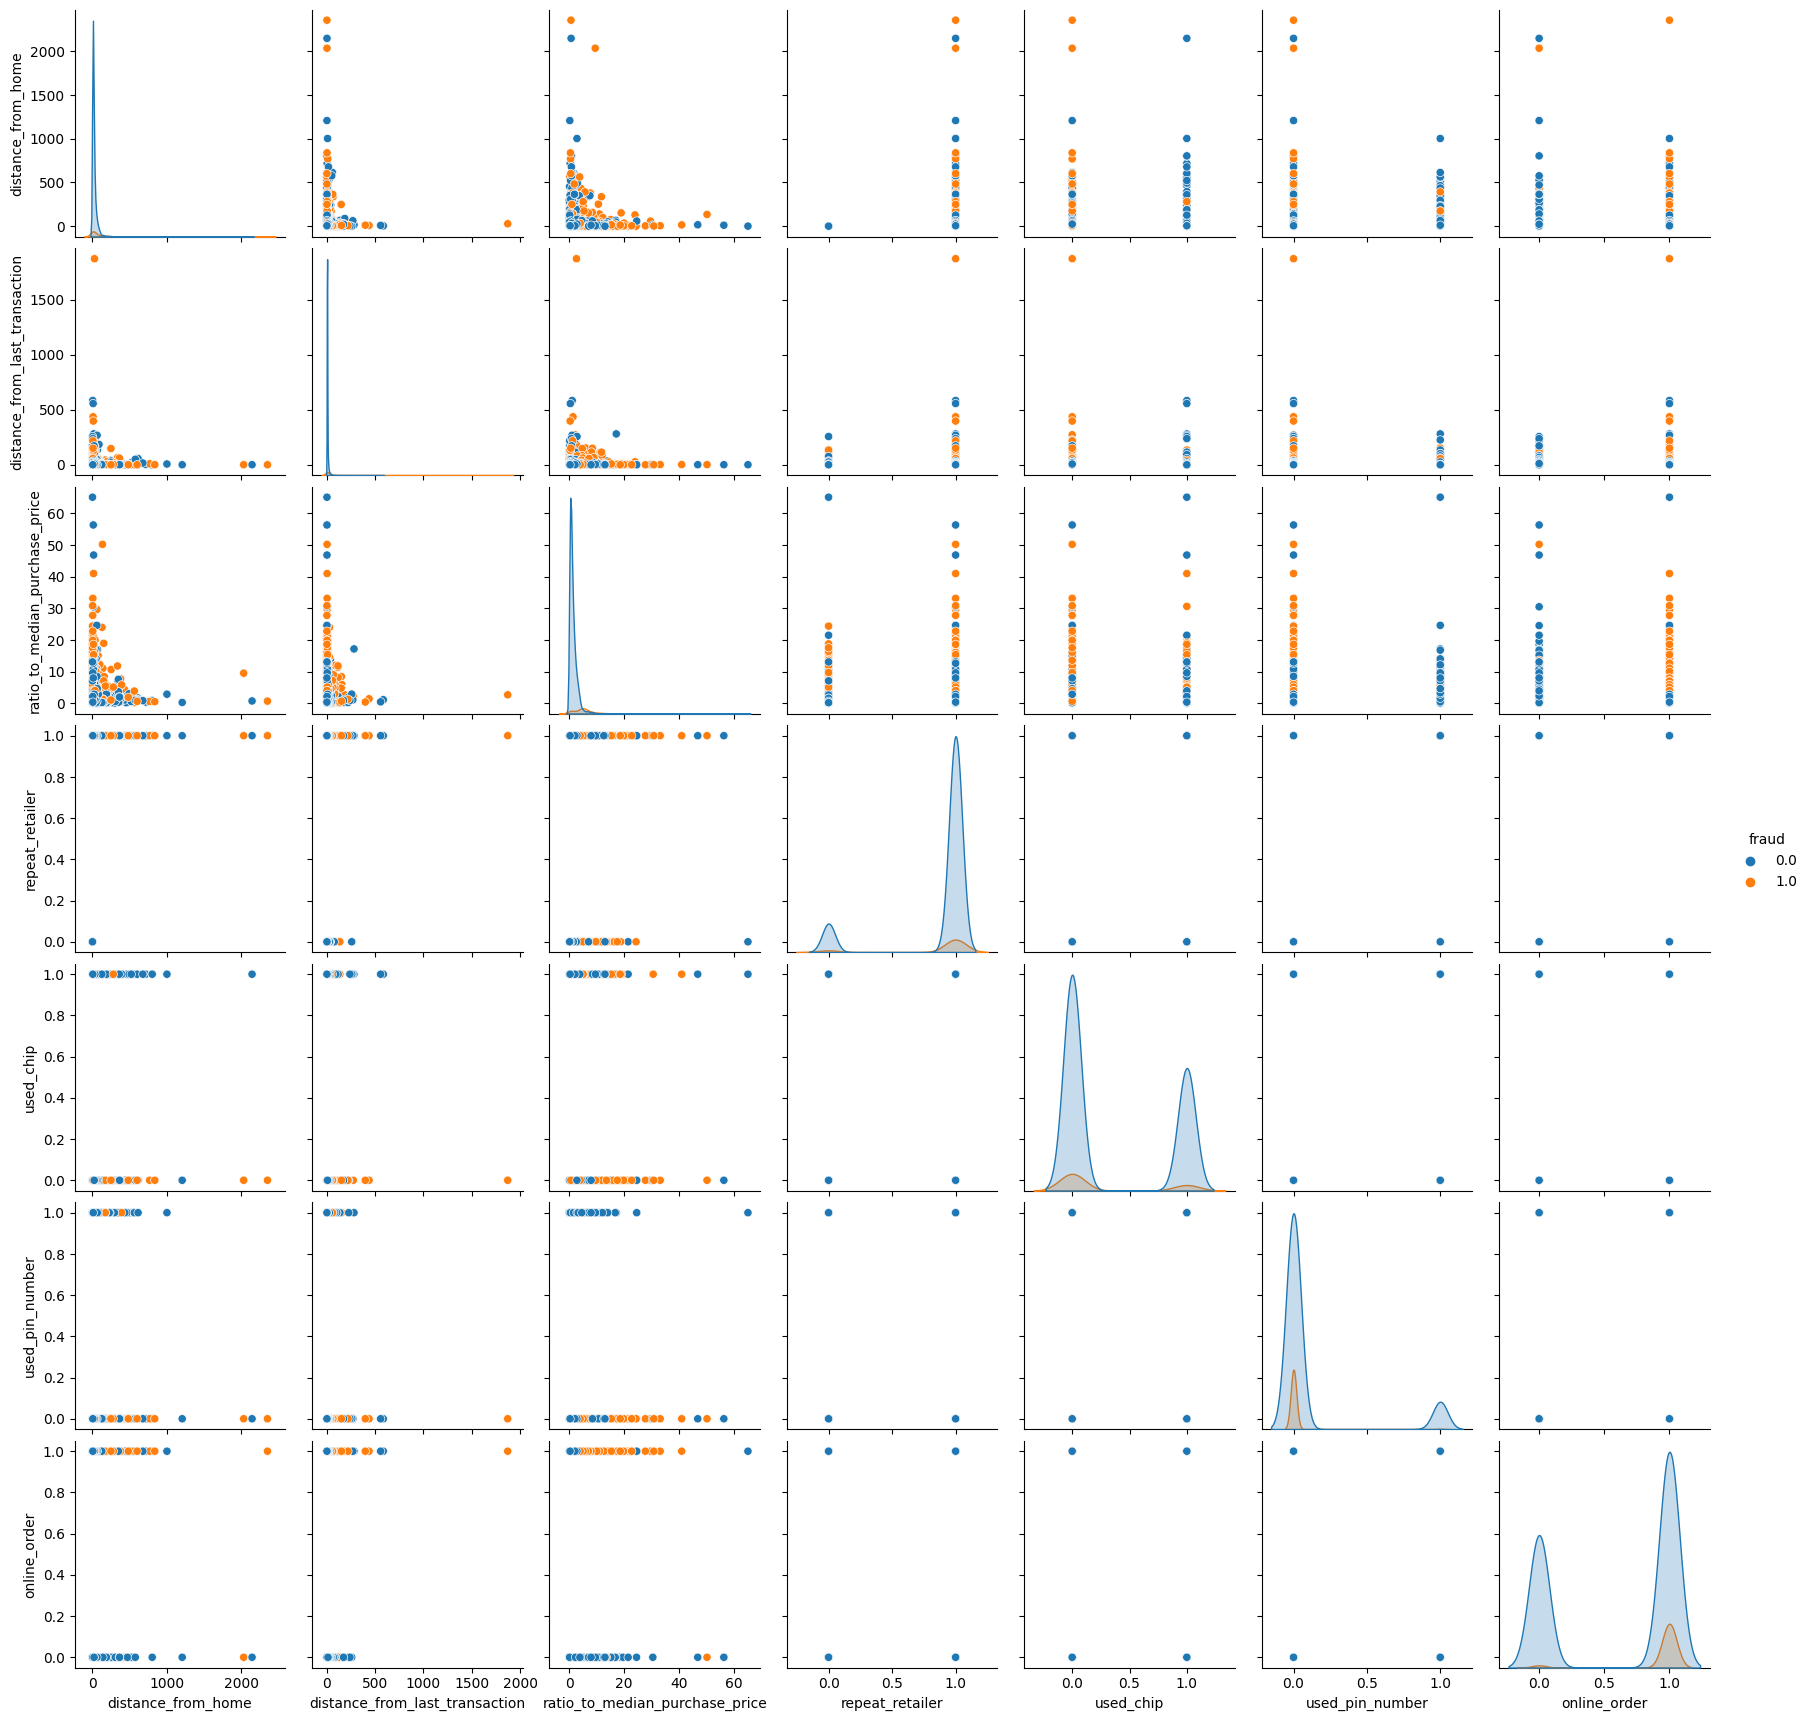

In [11]:
sns.pairplot(df_new,hue='fraud')
plt.show()

In [12]:
X = df.iloc[:,:-1]
X

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
27491,1.398054,0.035330,2.855457,0.0,0.0,1.0,0.0
27492,0.623286,2.782299,1.930534,0.0,0.0,0.0,1.0
27493,0.443459,1.886796,0.330056,0.0,0.0,0.0,1.0
27494,49.556801,0.378846,0.412026,1.0,0.0,0.0,1.0


In [13]:
y = df.iloc[:,-1:]
y

,fraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
27491,0.0
27492,0.0
27493,0.0
27494,0.0


**Train & Test Split**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
SD = StandardScaler()

In [18]:
X_train = SD.fit_transform(X_train)

In [19]:
X_test = SD.transform(X_test)

In [20]:
y_train_1d = np.ravel(y_train)

**Making SVC model & Choosing best hyper parameters using GridSearchCV**

In [21]:
from sklearn.svm import SVC
from hyperopt import fmin,tpe,Trials,hp,STATUS_OK
from sklearn.model_selection import cross_val_score

In [22]:
S = SVC()

In [23]:
space ={
    'C' : hp.quniform('C',1,5,1),
    'kernel': hp.choice('kernel',['linear', 'poly', 'rbf', 'sigmoid'])
}

In [24]:
def Bayesian(space):
    S = SVC(C = int(space['C']),
            kernel=space['kernel'])
    accuracy = cross_val_score(S,X_train,y_train_1d,cv=5).mean()
    return {'loss': -accuracy , 'status' : STATUS_OK}

In [25]:
trials = Trials()

In [26]:
Best = fmin(fn=Bayesian,space=space,algo=tpe.suggest,max_evals=200,trials=trials)

100%|██████████| 200/200 [18:52<00:00,  5.66s/trial, best loss: -0.9947718799727211]


In [27]:
Best

{'C': 5.0, 'kernel': 2}

In [28]:
S = SVC(C = 5 , kernel='rbf')

In [29]:
S.fit(X_train,y_train_1d)

SVC(C=5)

In [30]:
y_hat = S.predict(X_test)

**Checking accuracy**

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [32]:
print(accuracy_score(y_test,y_hat))

0.996


In [33]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5024
         1.0       0.99      0.97      0.98       476

    accuracy                           1.00      5500
   macro avg       0.99      0.98      0.99      5500
weighted avg       1.00      1.00      1.00      5500



In [34]:
print(confusion_matrix(y_test,y_hat))

[[5018    6]
 [  16  460]]
